# CMU Portugal Case Study
> Q4 2024

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

# Dataset - Estimation of Obesity Levels in Central America
(<a href = "https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">Link to data source</a>)

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

Dataset Characteristics: Multivariate

Subject Area: Health and Medicine

Associated Tasks: Classification, Regression, Clustering

Feature Type: Integer

Instance Count: 2111

Feature Count: 16

In [4]:
dataset_path = "dataset/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(dataset_path)

# Preview data

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

# Simplify data labels

In [6]:
# generate column names to relabel

df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
# simplify the column names

new_column_names = {
    'family_history_with_overweight': 'Family Overweight',
    'FAVC': 'High Cal Food', 
    'FCVC': 'Qty Vegetables', 
    'NCP': 'Qty Meals', 
    'CAEC': 'Eat Btw Meals', 
    'SMOKE': 'Smoker', 
    'CH2O': 'Qty Water', 
    'SCC': 'Monitor Calories', 
    'FAF': 'Qty Phys Activity', 
    'TUE': 'Hrs Use Technology',
    'CALC': 'Frq Alcohol', 
    'MTRANS': 'Mtd Transit', 
    'NObeyesdad': 'Obesity Level',      
}

# rename the columns based on the new_collumn_names dictionary
df = df.rename(columns=new_column_names)

df.head()

Gender   Age  Height  Weight Family Overweight High Cal Food  \
0  Female  21.0    1.62    64.0               yes            no   
1  Female  21.0    1.52    56.0               yes            no   
2    Male  23.0    1.80    77.0               yes            no   
3    Male  27.0    1.80    87.0                no            no   
4    Male  22.0    1.78    89.8                no            no   

   Qty Vegetables  Qty Meals Eat Btw Meals Smoker  Qty Water Monitor Calories  \
0             2.0        3.0     Sometimes     no        2.0               no   
1             3.0        3.0     Sometimes    yes        3.0              yes   
2             2.0        3.0     Sometimes     no        2.0               no   
3             3.0        3.0     Sometimes     no        2.0               no   
4             2.0        1.0     Sometimes     no        2.0               no   

   Qty Phys Activity  Hrs Use Technology Frq Alcohol            Mtd Transit  \
0                0.0                 1.0          no  Public_Transportation   
1                3.0                 0.0   Sometimes  Public_Transportation   
2                2.0                 1.0  Frequently  Public_Transportation   
3                2.0                 0.0  Frequently                Walking   
4                0.0                 0.0   Sometimes  Public_Transportation   

         Obesity Level  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

# Find and address null values

In [6]:
# Find nulls
# Nothing to address in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              2111 non-null   object 
 1   Age                 2111 non-null   float64
 2   Height              2111 non-null   float64
 3   Weight              2111 non-null   float64
 4   Family Overweight   2111 non-null   object 
 5   High Cal Food       2111 non-null   object 
 6   Qty Vegetables      2111 non-null   float64
 7   Qty Meals           2111 non-null   float64
 8   Eat Btw Meals       2111 non-null   object 
 9   Smoker              2111 non-null   object 
 10  Qty Water           2111 non-null   float64
 11  Monitor Calories    2111 non-null   object 
 12  Qty Phys Activity   2111 non-null   float64
 13  Hrs Use Technology  2111 non-null   float64
 14  Frq Alcohol         2111 non-null   object 
 15  Mtd Transit         2111 non-null   object 
 16  Obesit

# Examine distributions of the variables

In [9]:
# By comparing the mean to the max & min, we dont see outliers (in the numeric variables) from this method
df.describe()

Age       Height       Weight  Qty Vegetables    Qty Meals  \
count  2111.000000  2111.000000  2111.000000     2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058        2.419043     2.685628   
std       6.345968     0.093305    26.191172        0.533927     0.778039   
min      14.000000     1.450000    39.000000        1.000000     1.000000   
25%      19.947192     1.630000    65.473343        2.000000     2.658738   
50%      22.777890     1.700499    83.000000        2.385502     3.000000   
75%      26.000000     1.768464   107.430682        3.000000     3.000000   
max      61.000000     1.980000   173.000000        3.000000     4.000000   

         Qty Water  Qty Phys Activity  Hrs Use Technology  
count  2111.000000        2111.000000         2111.000000  
mean      2.008011           1.010298            0.657866  
std       0.612953           0.850592            0.608927  
min       1.000000           0.000000            0.000000  
25%       1.584812           0.124505            0.000000  
50%       2.000000           1.000000            0.625350  
75%       2.477420           1.666678            1.000000  
max       3.000000           3.000000            2.000000

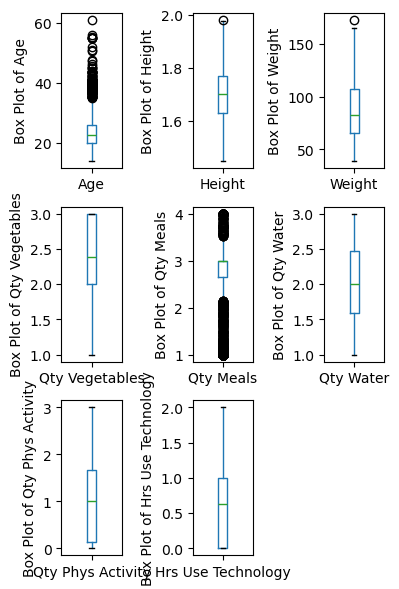

In [14]:
# Box plot to graphically show outlier analysis from above
# Next, find out how to improve UX by plotting in grids

import matplotlib.pyplot as plt

float_df=df.iloc[:,[1,2,3,6,7,10,12,13]] # makeing df of just float values in original df
plt.figure(figsize=(4, 6))
for x in range(len(float_df.columns.values)):
    
    plt.subplot(3,3,x+1) #attempting to print output in grid
    df.boxplot(column=float_df.columns.values[x], grid=False)
    plt.ylabel("Box Plot of " + float_df.columns.values[x])
    #plt.suptitle('')  # Suppress automatic title

plt.tight_layout()
plt.show()

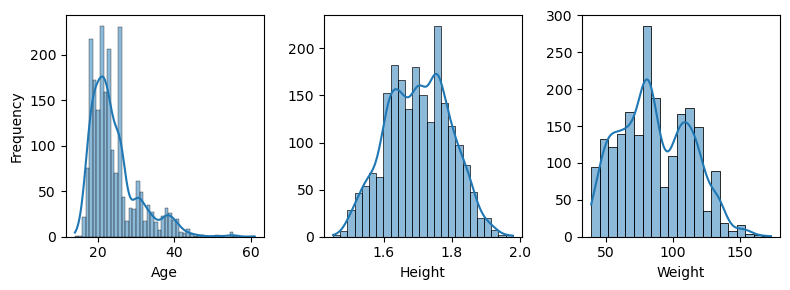

In [52]:
# Examine data witih histograms
# Only look at truly continuous variables here
plt.figure(figsize=(8, 3))

#Only plot first three
all_columns = float_df.columns
for x,column in enumerate(all_columns[0:3]):
    plt.subplot(1,3,x+1)
    #df[float_df.columns.values[x]].plot(kind='hist', bins=50, color='orange', edgecolor='black')
    sns.histplot(x=column, data= float_df, bins="auto", kde=True)
    #plt.title("Distribution of "+ float_df.columns.values[x])
    
    if np.mod(x,3) == 0:
        plt.ylabel("Frequency")
    else:
        plt.ylabel("")

plt.tight_layout()
plt.show()

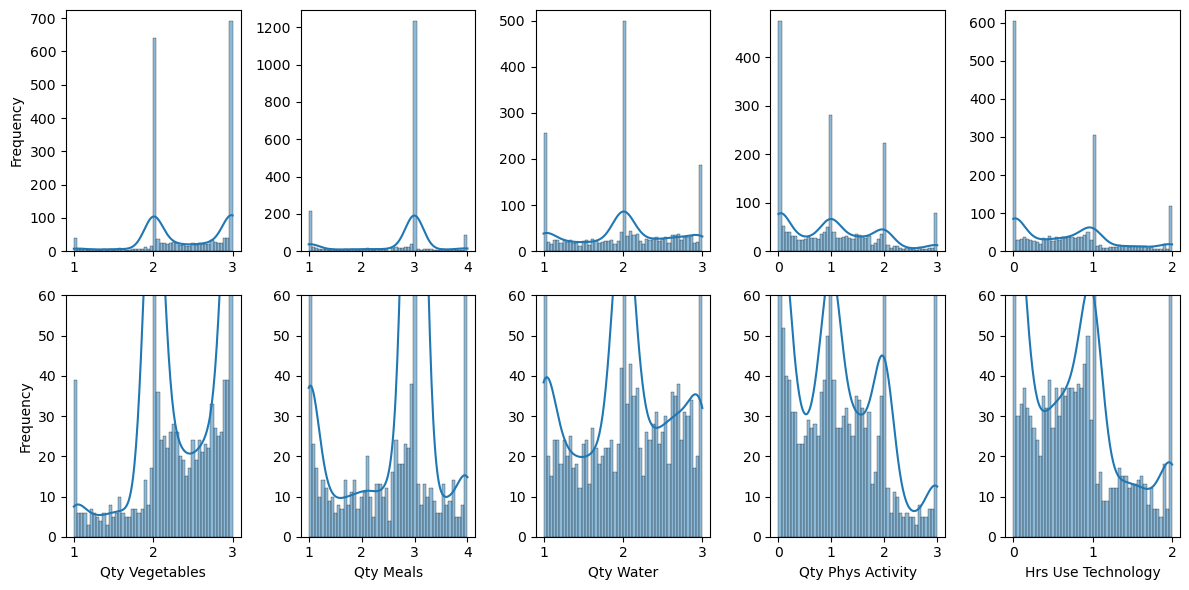

In [55]:
# other plots with zoom to highlight synthetic data
# Look for outliers by graphing histograms (numeric variables)
plt.figure(figsize=(12, 6))

for x,column in enumerate(all_columns[3:]):
    plt.subplot(2,5,x+1)
    sns.histplot(x=column, data= float_df, bins=50, kde=True)
    #plt.title("Distribution of "+ float_df.columns.values[x])
    plt.xlabel('')
    if np.mod(x,5) == 0:
        plt.ylabel("Frequency")
    else:
        plt.ylabel("")
    #Same plot zoomed in
    plt.subplot(2,5,x+6)
    sns.histplot(x=column, data= float_df, bins=50, kde=True)
    
    plt.ylim((0,60))
    if np.mod(x,5) == 0:
        plt.ylabel("Frequency")
    else:
        plt.ylabel("")

plt.tight_layout()
plt.show()

# Categorical variables

In [117]:
# Percentages in each category

text_df=df.iloc[:,[0,4,5,8,9,11,14,15,16]] # create df of only text values from original df - Find better way!

for column in text_df.columns:
    category_counts = text_df[column].value_counts()
    # Calculate percentages
    category_percentages = category_counts / category_counts.sum() * 100
    print(category_percentages)
    print()

Gender
Male      50.592136
Female    49.407864
Name: count, dtype: float64

Family Overweight
yes    81.762198
no     18.237802
Name: count, dtype: float64

High Cal Food
yes    88.394126
no     11.605874
Name: count, dtype: float64

Eat Btw Meals
Sometimes     83.609664
Frequently    11.463761
Always         2.510658
no             2.415917
Name: count, dtype: float64

Smoker
no     97.91568
yes     2.08432
Name: count, dtype: float64

Monitor Calories
no     95.452392
yes     4.547608
Name: count, dtype: float64

Frq Alcohol
Sometimes     66.366651
no            30.270014
Frequently     3.315964
Always         0.047371
Name: count, dtype: float64

Mtd Transit
Public_Transportation    74.846045
Automobile               21.648508
Walking                   2.652771
Motorbike                 0.521080
Bike                      0.331596
Name: count, dtype: float64

Obesity Level
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Le

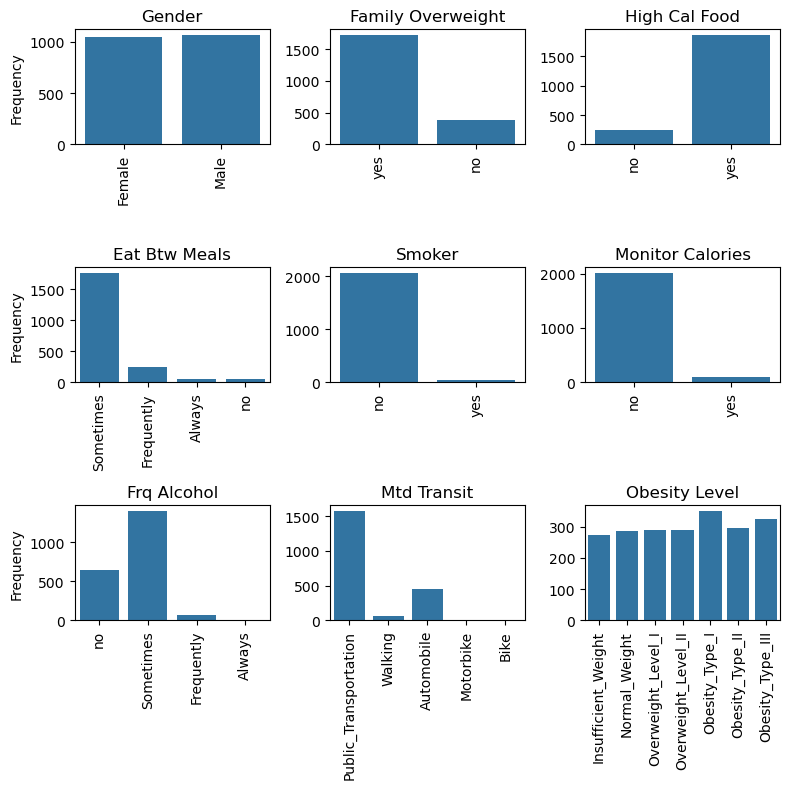

In [56]:
plt.figure(figsize=(8,8))
#custom order for obesity level
custom_obesity = ["Insufficient_Weight", "Normal_Weight","Overweight_Level_I","Overweight_Level_II",
                  "Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]

for i,column in enumerate(text_df.columns):
    
    # Plot the result as a bar plot
    plt.subplot(3,3,i+1)
    if column == "Obesity Level":
        sns.countplot(x=column, data=text_df, order=custom_obesity)
    else:
        sns.countplot(x=column, data=text_df)

    # Use value_counts() to get the counts of each category
    #category_counts = text_df[column].value_counts()
    #category_counts.plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation=90)
    plt.xlabel('')
    if np.mod(i,3) == 0:
        plt.ylabel('Frequency')
    else:
        plt.ylabel('')
    
plt.tight_layout()
plt.show()

                         Age    Height    Weight  Qty Vegetables  Qty Meals  \
Age                 1.000000 -0.025958  0.202560        0.016291  -0.043944   
Height             -0.025958  1.000000  0.463136       -0.038121   0.243672   
Weight              0.202560  0.463136  1.000000        0.216125   0.107469   
Qty Vegetables      0.016291 -0.038121  0.216125        1.000000   0.042216   
Qty Meals          -0.043944  0.243672  0.107469        0.042216   1.000000   
Qty Water          -0.045304  0.213376  0.200575        0.068461   0.057088   
Qty Phys Activity  -0.144938  0.294709 -0.051436        0.019939   0.129504   
Hrs Use Technology -0.296931  0.051912 -0.071561       -0.101135   0.036326   

                    Qty Water  Qty Phys Activity  Hrs Use Technology  
Age                 -0.045304          -0.144938           -0.296931  
Height               0.213376           0.294709            0.051912  
Weight               0.200575          -0.051436           -0.071561  
Qty 

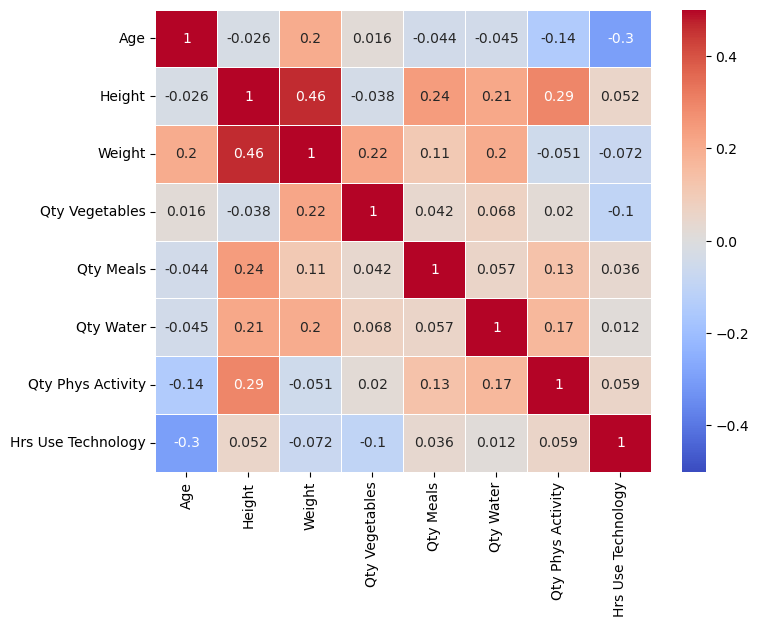

In [60]:
# Calculate coorelation between numeric variables 

plt.figure(figsize=(8, 6))
correlation = df.corr(numeric_only=True)
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.5, vmax=0.5)
plt.show()

<Figure size 800x600 with 0 Axes>

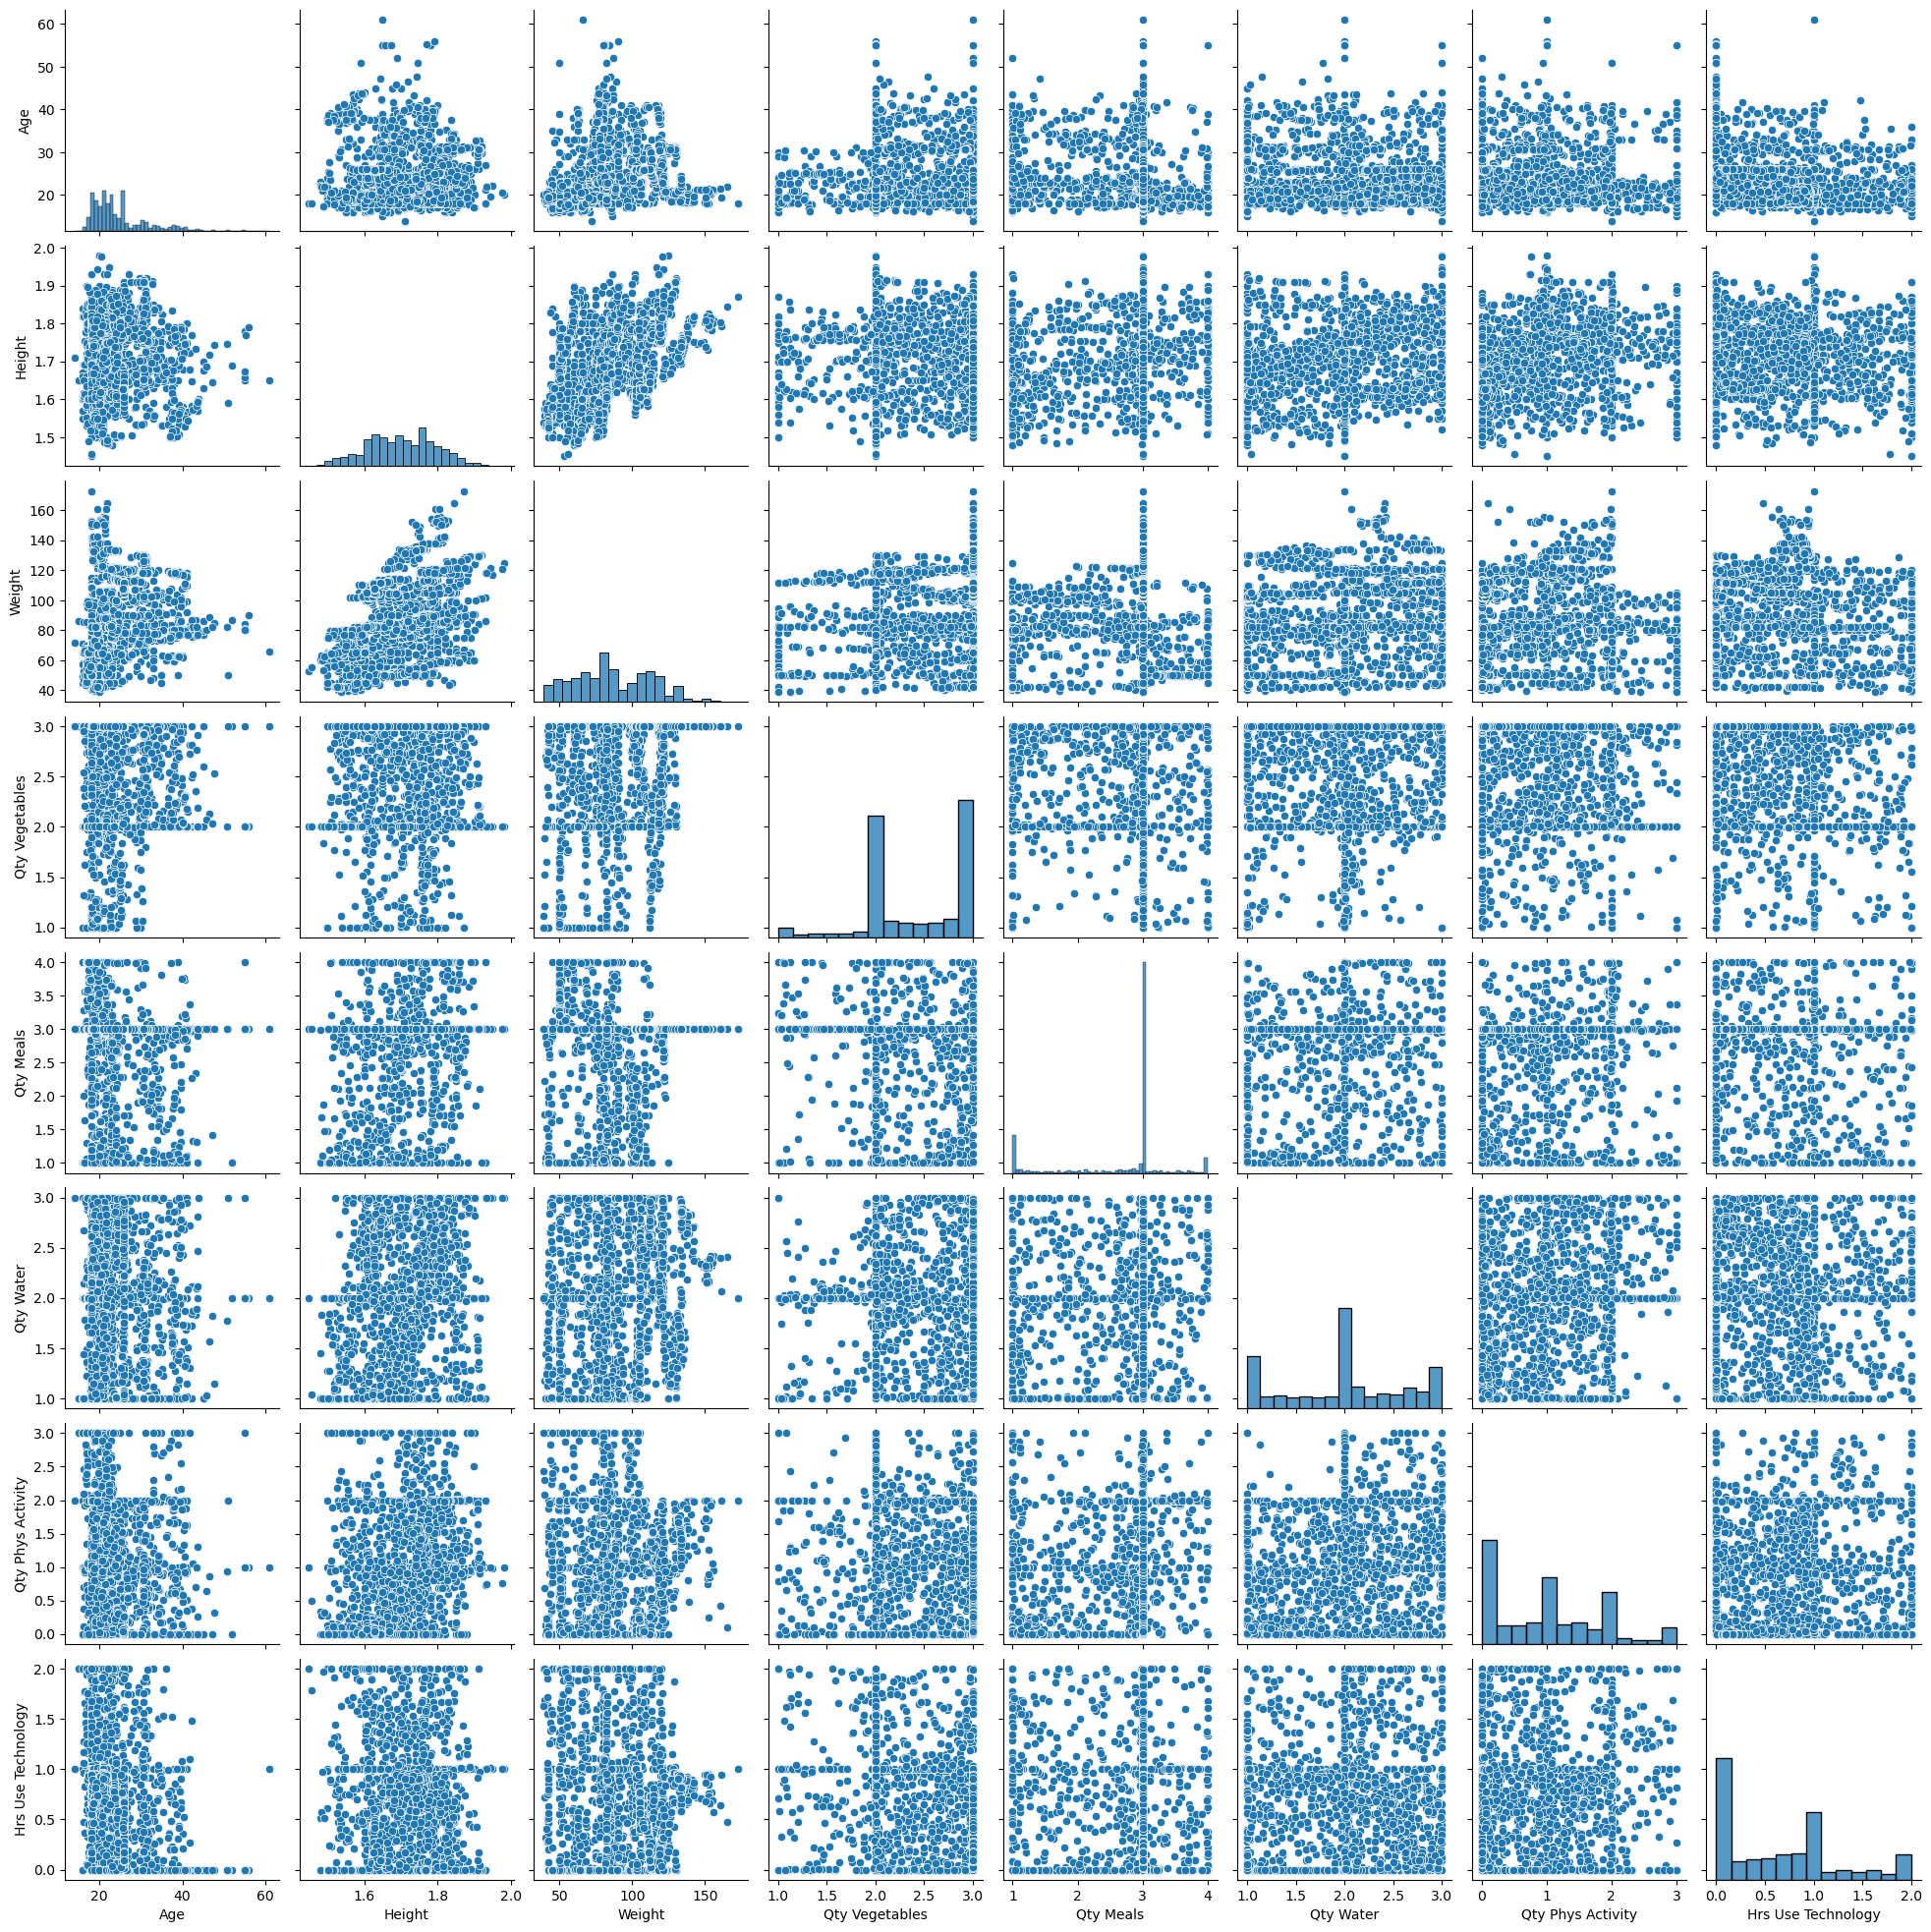

In [62]:
# pairwise plot that shows everything all at once
plt.figure(figsize=(8, 6))
sns.pairplot(data=df)
plt.show()

# Calculate BMI and see how it relates to other variables

In [63]:
# Get a BMI metric
df["BMI"] = df["Weight"] / df["Height"] ** 2
df["BMI"].describe()


count    2111.000000
mean       29.700159
std         8.011337
min        12.998685
25%        24.325802
50%        28.719089
75%        36.016501
max        50.811753
Name: BMI, dtype: float64

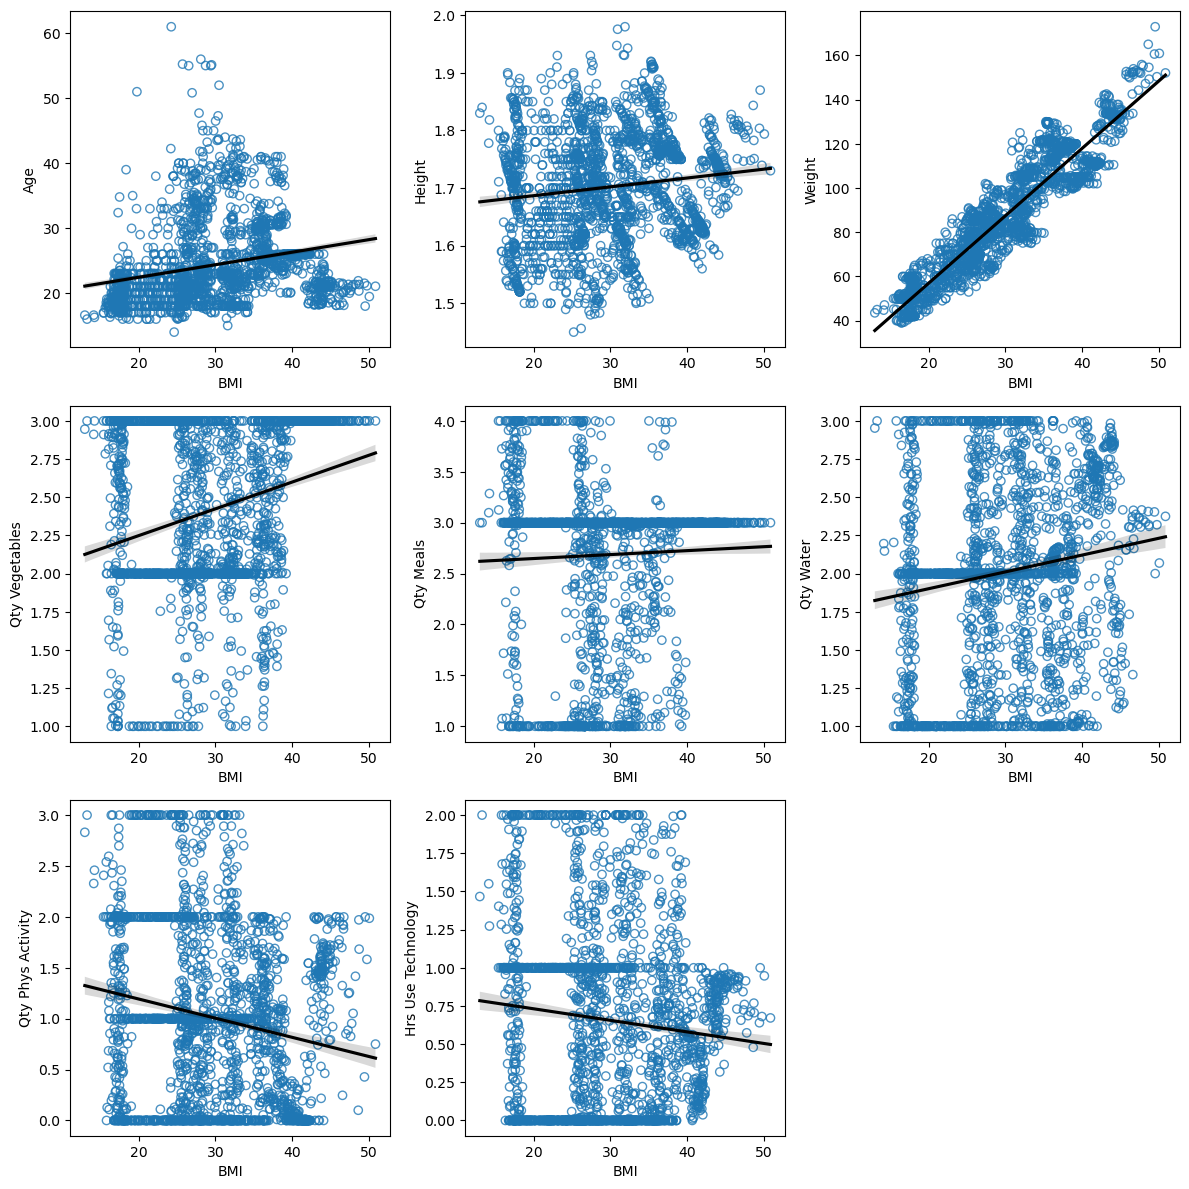

In [76]:
#Get scatter plots with all different variables
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,12))
for i,column in enumerate(numeric_df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.regplot(data=df,x="BMI",y=column, line_kws={'color':'black'},
                scatter_kws={'facecolor': 'none'})

plt.tight_layout()
plt.show()
    

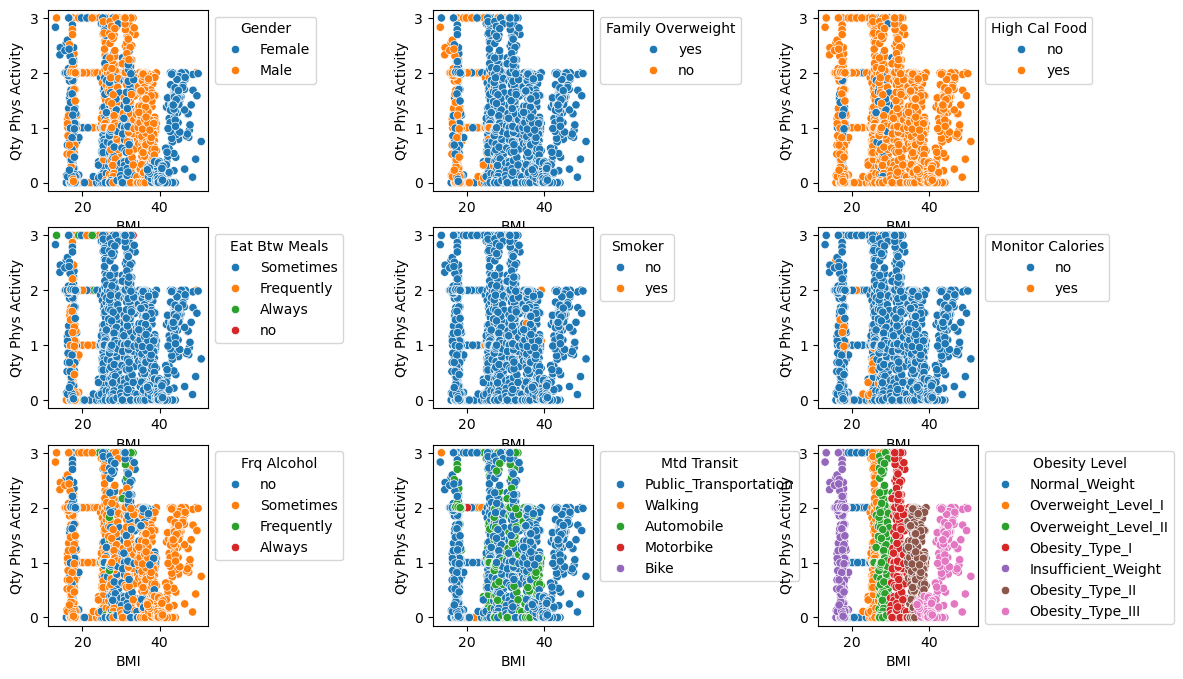

In [95]:
# Use hue to examine categorical variables
categorical_df = df.select_dtypes(include=['object'])

plt.figure(figsize=(12,8))

#Space out plots to allow space for the legends
plot_locs = [1,3,5,6,8,10,11,13,15]

for i,column in enumerate(categorical_df.columns):
    plt.subplot(3,5,plot_locs[i])
    sns.scatterplot(data=df, x="BMI",y="Qty Phys Activity",hue=column)
    plt.legend(title=column, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout
plt.show()

# Select features for predicting obesity

In [198]:
# Select numeric features based on correlation
BMI_corr = df.corr(numeric_only=True)
corr_threshold = 0.05 #Very lenient for now

# Remove weight, since it is too closely related
BMI_corr = BMI_corr.drop(index=["Weight"])

# Filter based on correlation
numeric_selection = BMI_corr.index[BMI_corr["BMI"].abs() > corr_threshold].values
print(numeric_selection)

['Age' 'Height' 'Qty Vegetables' 'Qty Water' 'Qty Phys Activity'
 'Hrs Use Technology' 'BMI']


In [199]:
# Select categorical features
# Remove features where the percentage in 1 category is too high
percentage_threshold = 85
categorical_selection_bool = []
for column in categorical_df.columns:
    category_counts = categorical_df[column].value_counts()
    # Calculate percentages
    category_percentages = category_counts / category_counts.sum() * 100
    categorical_selection_bool.append(all(category_percentages < percentage_threshold))

    print(column)
    print(categorical_selection_bool[-1])
    print()

#Manually remove obesity level since it is BMI
categorical_selection_bool[-1] = False

categorical_selection = categorical_df.columns[categorical_selection_bool].values
print(categorical_selection)

Gender
True

Family Overweight
True

High Cal Food
False

Eat Btw Meals
True

Smoker
False

Monitor Calories
False

Frq Alcohol
True

Mtd Transit
True

Obesity Level
True

['Gender' 'Family Overweight' 'Eat Btw Meals' 'Frq Alcohol' 'Mtd Transit']


In [200]:
selected_features = np.concatenate((numeric_selection,categorical_selection))

selected_df = df[selected_features]
print(selected_df.columns)

Index(['Age', 'Height', 'Qty Vegetables', 'Qty Water', 'Qty Phys Activity',
       'Hrs Use Technology', 'BMI', 'Gender', 'Family Overweight',
       'Eat Btw Meals', 'Frq Alcohol', 'Mtd Transit'],
      dtype='object')


# Prepare categorical variables for regression
Simplify some categorical variables that have too many categories
This may not be necessary

In [201]:
# Eat between meals
EBW_groups = {'no':'no-sometimes','Sometimes':'no-sometimes',
              'Frequently':'frequently-always','Always':'frequently-always'}

selected_df.loc[:,"Eat Btw Meals"] = selected_df["Eat Btw Meals"].replace(EBW_groups)
selected_df["Eat Btw Meals"].value_counts() / selected_df["Eat Btw Meals"].value_counts().sum()

# Frequency of alcohol use
alcohol_groups = {'Sometimes':'yes','Frequently':'yes','Always':'yes'}
selected_df.loc[:,"Frq Alcohol"] = selected_df["Frq Alcohol"].replace(alcohol_groups)
selected_df["Frq Alcohol"].value_counts() / selected_df["Frq Alcohol"].value_counts().sum()

# Mode of transpart
transport_groups = {"Walking":"unpowered","Bike":"unpowered",
                    "Automobile":"personal_vehicle","Motorbike":"personal_vehicle"}
selected_df.loc[:,"Mtd Transit"] = selected_df["Mtd Transit"].replace(transport_groups)
selected_df["Mtd Transit"].value_counts() / selected_df["Mtd Transit"].value_counts().sum()


Mtd Transit
Public_Transportation    0.748460
personal_vehicle         0.221696
unpowered                0.029844
Name: count, dtype: float64

Recode all categorical variables

In [202]:
# Define mappings manually to control how the variables are mapped
gender_map = {"Male":0,"Female":1}
family_overweight_map = {"no":0,"yes":1}
eat_btw_map = {'no-sometimes':0,'frequently-always':1}
alcohol_map = family_overweight_map
mtd_transport_map = {'unpowered':0,'Public_Transportation':1,'personal_vehicle':2}

#apply mapping
selected_df.loc[:,"Gender"] = selected_df["Gender"].map(gender_map)
selected_df.loc[:,"Family Overweight"] = selected_df["Family Overweight"].map(family_overweight_map)
selected_df.loc[:,"Eat Btw Meals"] = selected_df["Eat Btw Meals"].map(eat_btw_map)
selected_df.loc[:,"Frq Alcohol"] = selected_df["Frq Alcohol"].map(alcohol_map)
selected_df.loc[:,"Mtd Transit"] = selected_df["Mtd Transit"].map(mtd_transport_map)

selected_df["Mtd Transit"].value_counts()

Mtd Transit
1    1580
2     468
0      63
Name: count, dtype: int64

# Perform linear regression

## Import libraries

In [338]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


## Prepare data

In [391]:
# split data into features and target
X = selected_df.drop(columns="BMI")
y = selected_df["BMI"]

# original dataset
print("Original dataset")
print("Input Features:", X.shape)
print("Target Features:", y.shape)
print()

# 1. Train and Test Split (No validation since we are not doing hyperparameter tuning)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_train.shape)
print()


Original dataset
Input Features: (2111, 11)
Target Features: (2111,)

Training set: (1688, 11) (1688,)
Test set: (423, 11) (423,)



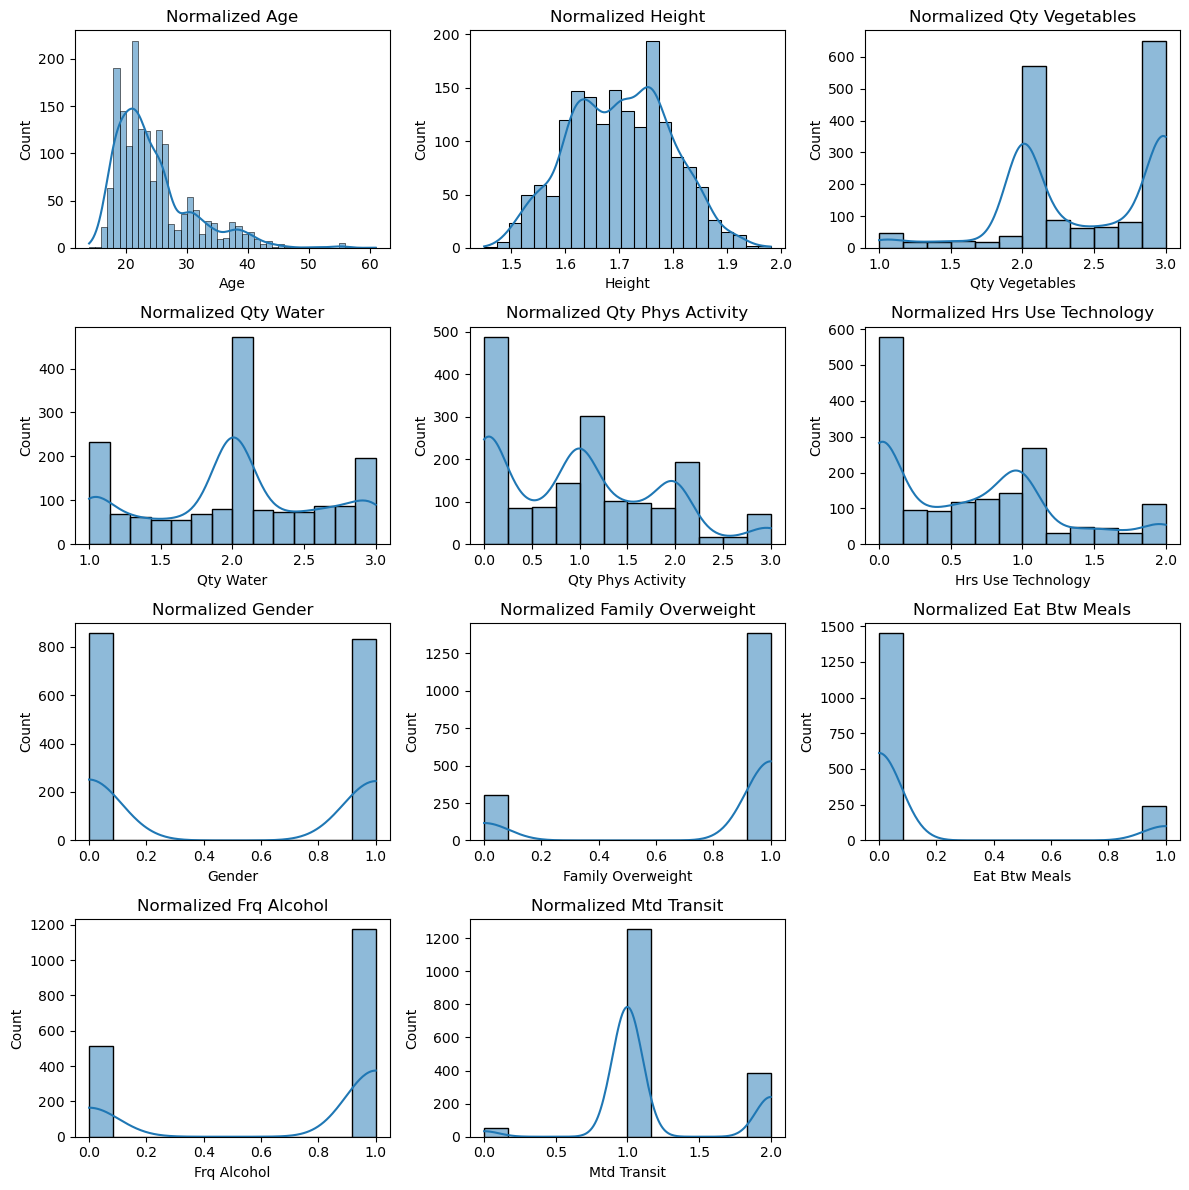

In [392]:
# Plotting features before normalization
plt.figure(figsize=(12, 12))
for i, feature in enumerate(X.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(X_train[feature], bins="auto", kde=True)
    plt.title(f'Normalized {feature}')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

Use cross-validation to figure out how well hyperparameters are performing

But since we are doing a linear regression there are no hyperparameters to tune

## Feature Scaling

In [393]:
# Standardization (zero mean, unit variance)
scaler_standard = StandardScaler()

X_train_standard = X_train.copy()
X_test_standard = X_test.copy()
X_train_standard[numeric_selection[:-1]] = scaler_standard.fit_transform(X_train_standard[numeric_selection[:-1]])
X_test_standard[numeric_selection[:-1]] = scaler_standard.transform(X_test_standard[numeric_selection[:-1]])

# Standardize target (not sure if this helps (it doesnt))
y_train_standard = y_train.copy()
y_test_standard = y_test.copy()
y_train_standard = scaler_standard.fit_transform(y_train_standard.to_frame())
y_test_standard = scaler_standard.transform(y_test_standard.to_frame())
y_train_standard = y_train_standard[:,0]
y_test_standard = y_test_standard[:,0]


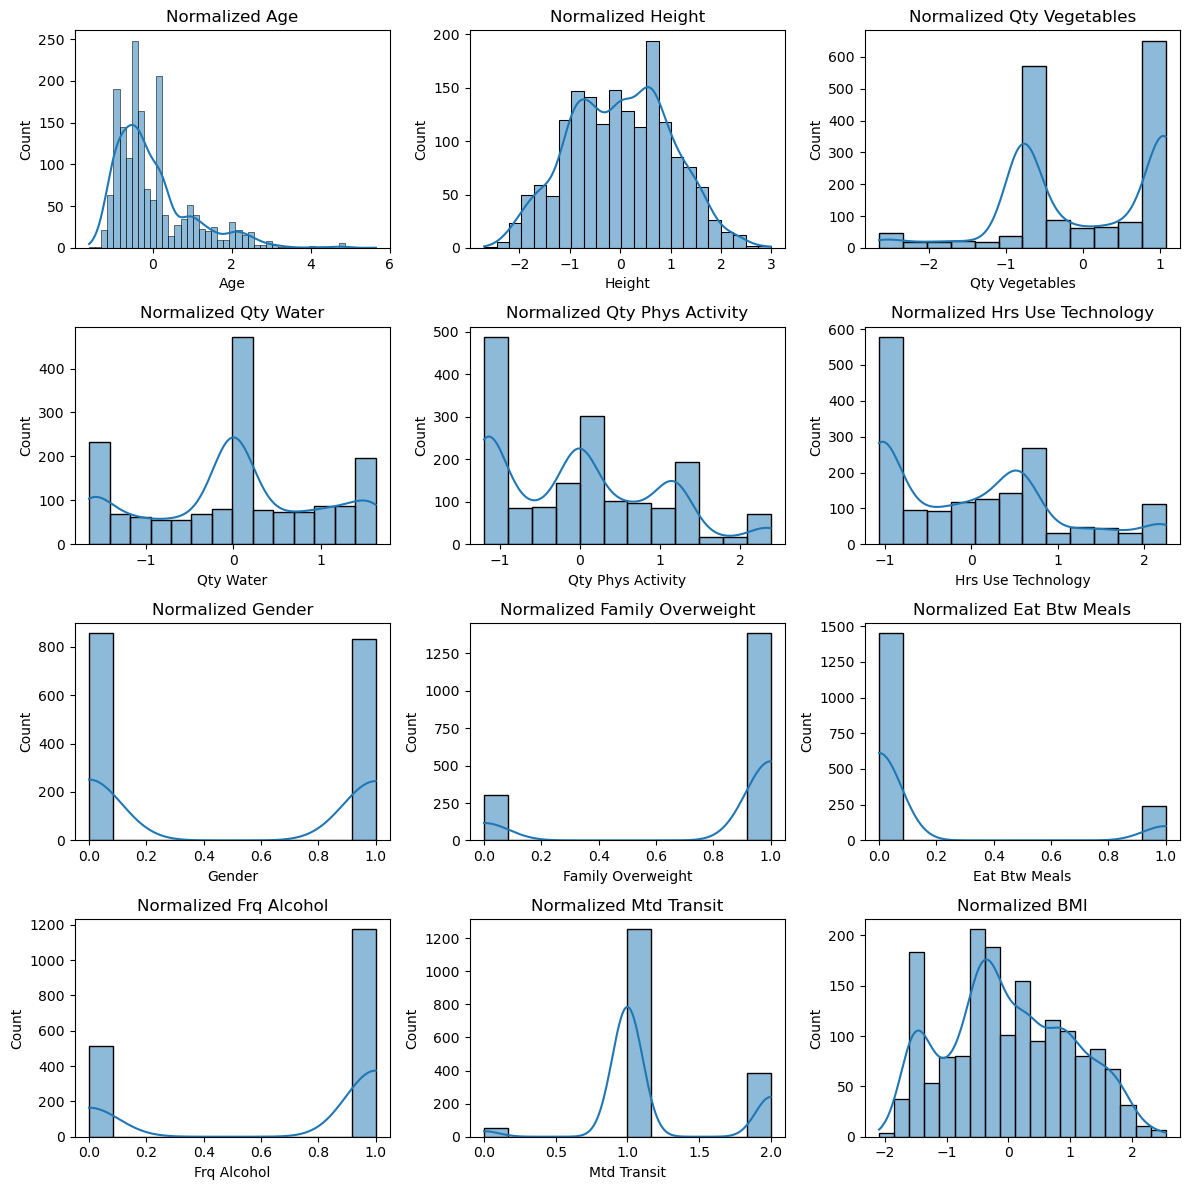

In [394]:
# Plotting features after normalization
plt.figure(figsize=(12, 12))
for i, feature in enumerate(X.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(X_train_standard[feature], bins="auto", kde=True)
    plt.title(f'Normalized {feature}')
plt.subplot(4, 3, 12)
sns.histplot(y_train_standard, bins="auto", kde=True)
plt.title('Normalized BMI')
plt.tight_layout()
plt.show()



## Perform linear regression

In [395]:
# "Fit" model
linReg = LinearRegression()
linReg.fit(X_train_standard, y_train)

print("Intercept: "+str(round(linReg.intercept_,3)))
print("Weight coefficients")
for i,column in enumerate(X_train.columns):
    print(column + ': ' + str(round(linReg.coef_[i],3)))




Intercept: 25.216
Weight coefficients
Age: 1.48
Height: 0.875
Qty Vegetables: 1.755
Qty Water: 0.294
Qty Phys Activity: -1.056
Hrs Use Technology: -0.252
Gender: 1.512
Family Overweight: 7.011
Eat Btw Meals: -6.508
Frq Alcohol: 2.62
Mtd Transit: -2.427


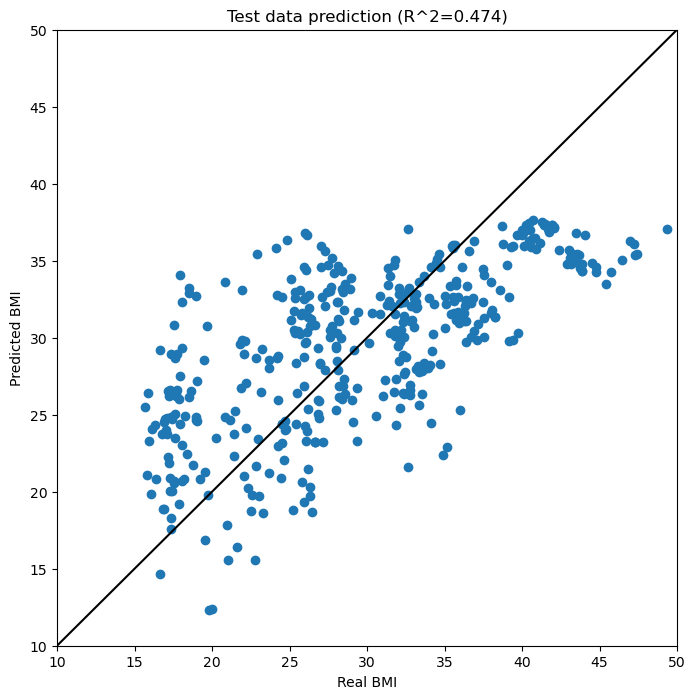

In [396]:

#Evaluate
y_test_pred = linReg.predict(X_test_standard)
rmse = root_mean_squared_error(y_test,y_test_pred)
r_sqr = r2_score(y_test,y_test_pred)

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_test_pred)
plt.xlabel("Real BMI")
plt.ylabel("Predicted BMI")
plt.title('Test data prediction (R^2='+str(round(r_sqr,3))+')')

#Plot unity line
plt.plot([10, 50],[10,50],color='black')

plt.xlim((10,50))
plt.ylim((10,50))
plt.show()

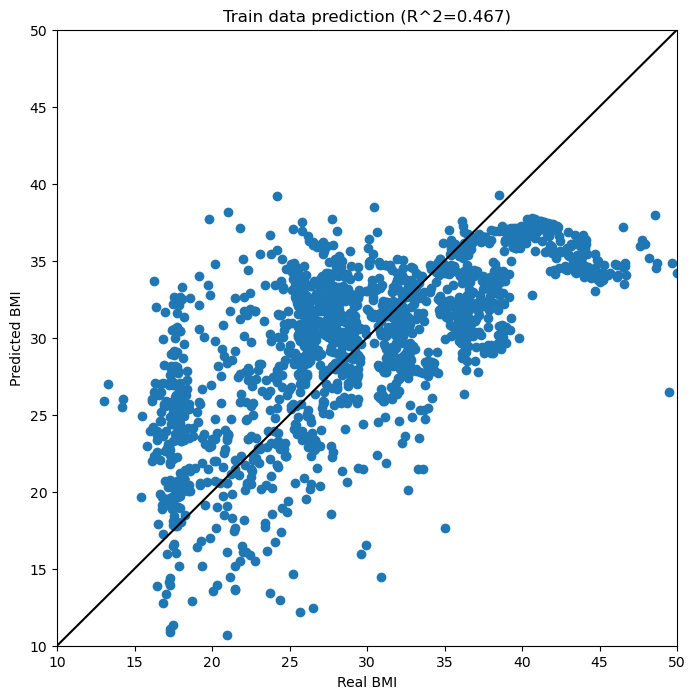

In [397]:
#Evaluate on train data
# Does it perform better here than in test? -> No
y_train_pred = linReg.predict(X_train_standard)
rmse = root_mean_squared_error(y_train,y_train_pred)
r_sqr = r2_score(y_train,y_train_pred)

plt.figure(figsize=(8,8))
plt.scatter(y_train,y_train_pred)
plt.xlabel("Real BMI")
plt.ylabel("Predicted BMI")
plt.title('Train data prediction (R^2='+str(round(r_sqr,3))+')')

#Plot unity line
plt.plot([10, 50],[10,50],color='black')

plt.xlim((10,50))
plt.ylim((10,50))
plt.show()

## Does normalizing the target matter?
It doesn't absolutely the same score

In [398]:
# "Fit" model
linReg_stand = LinearRegression()
linReg_stand.fit(X_train_standard, y_train_standard)

print("Intercept: "+str(round(linReg_stand.intercept_,3)))
print("Weight coefficients")
for i,column in enumerate(X_train.columns):
    print(column + ': ' + str(round(linReg_stand.coef_[i],3)))

Intercept: -0.563
Weight coefficients
Age: 0.186
Height: 0.11
Qty Vegetables: 0.22
Qty Water: 0.037
Qty Phys Activity: -0.132
Hrs Use Technology: -0.032
Gender: 0.19
Family Overweight: 0.879
Eat Btw Meals: -0.816
Frq Alcohol: 0.328
Mtd Transit: -0.304


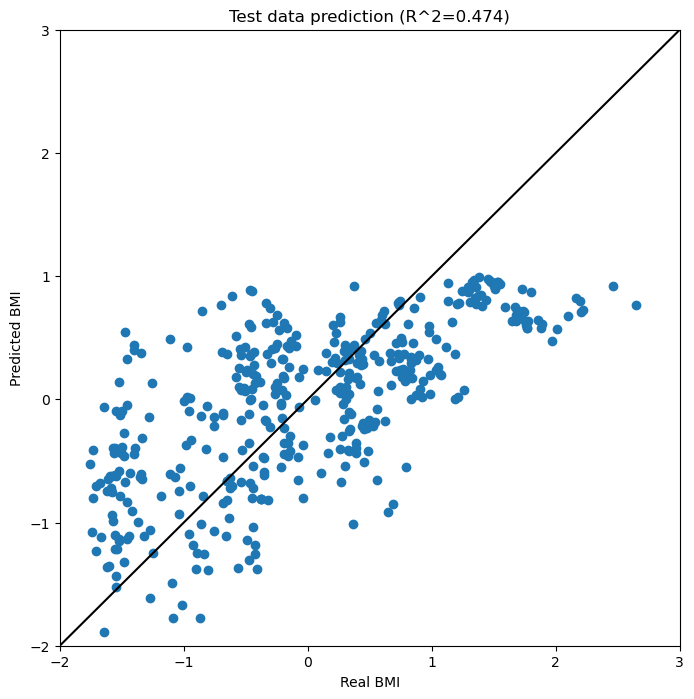

In [399]:
#Evaluate
y_test_pred = linReg_stand.predict(X_test_standard)
rmse = root_mean_squared_error(y_test_standard,y_test_pred)
r_sqr = r2_score(y_test_standard,y_test_pred)

plt.figure(figsize=(8,8))
plt.scatter(y_test_standard,y_test_pred)
plt.xlabel("Real BMI")
plt.ylabel("Predicted BMI")
plt.title('Test data prediction (R^2='+str(round(r_sqr,3))+')')

#Plot unity line
plot_limits = [-2, 3]
plt.plot(plot_limits,plot_limits,color='black')

plt.xlim(tuple(plot_limits))
plt.ylim(tuple(plot_limits))
plt.show()

## Use wrapper to eliminate more features

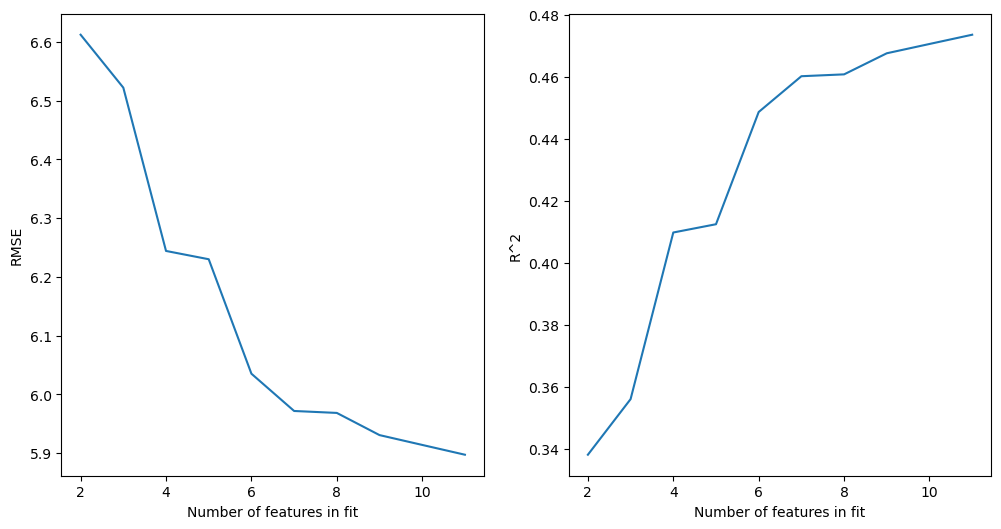

In [400]:
# Recursive Feature Elimination (RFE)
model_rfe = LinearRegression()

# see how rmse changes with number of features
rmse_rfe = []
r_sqr_rfe = []
for i in range(2,12):
    rfe = RFE(estimator=model_rfe, n_features_to_select=i)
    rfe.fit(X_train_standard, y_train)
    #Evaluate
    y_test_pred_rfe = rfe.predict(X_test_standard)
    rmse_rfe.append(root_mean_squared_error(y_test,y_test_pred_rfe))
    r_sqr_rfe.append(r2_score(y_test,y_test_pred_rfe))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(2,12),rmse_rfe)
plt.ylabel("RMSE")
plt.xlabel("Number of features in fit")
plt.subplot(1,2,2)
plt.plot(range(2,12),r_sqr_rfe)
plt.ylabel("R^2")
plt.xlabel("Number of features in fit")
plt.show()

    

In [401]:
# chose number of features based on graph
rfe = RFE(estimator=model_rfe, n_features_to_select=7)
rfe.fit(X_train_standard, y_train)
print("Selected features using RFE:\n", X.columns[rfe.support_].values)


Selected features using RFE:
 ['Age' 'Qty Vegetables' 'Qty Phys Activity' 'Family Overweight'
 'Eat Btw Meals' 'Frq Alcohol' 'Mtd Transit']


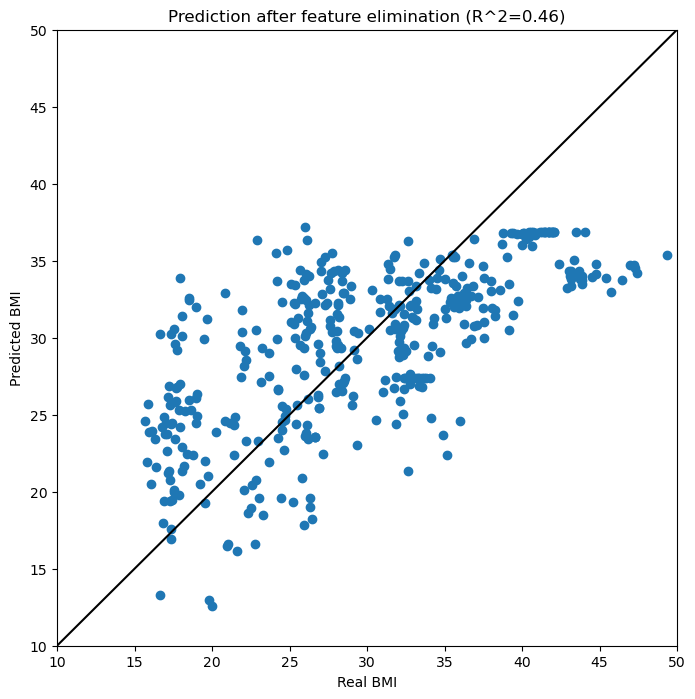

In [402]:

#Evaluate
y_test_pred = rfe.predict(X_test_standard)
rmse = root_mean_squared_error(y_test,y_test_pred)
r_sqr = r2_score(y_test,y_test_pred)

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_test_pred)
plt.xlabel("Real BMI")
plt.ylabel("Predicted BMI")
plt.title('Prediction after feature elimination (R^2='+str(round(r_sqr,3))+')')

#Plot unity line
plt.plot([10, 50],[10,50],color='black')

plt.xlim((10,50))
plt.ylim((10,50))
plt.show()

# Strip out synthethic data and try again

In [403]:
# Get a filter assuming real data points only sit at integer values
# for a selection of variables
real_fltr = np.full(df.shape[0], True)

print(df.columns[[6,7,10,12,13]])

for col in df.columns[[6,7,10,12,13]]:
    real_values = np.mod(df[col],1) == 0
    real_fltr = real_fltr & real_values
    print(sum(real_fltr))

X_real = X[real_fltr]
y_real = y[real_fltr]

Index(['Qty Vegetables', 'Qty Meals', 'Qty Water', 'Qty Phys Activity',
       'Hrs Use Technology'],
      dtype='object')
1285
1076
608
543
531


## Run regression on real data and evaluate

Intercept: 23.799
Weight coefficients
Age: 1.199
Height: 0.063
Qty Vegetables: -0.184
Qty Water: 0.553
Qty Phys Activity: -0.555
Hrs Use Technology: 0.062
Gender: -1.574
Family Overweight: 1.998
Eat Btw Meals: -1.432
Frq Alcohol: 0.19
Mtd Transit: 0.458
4.639875627794041
6.756823647797846


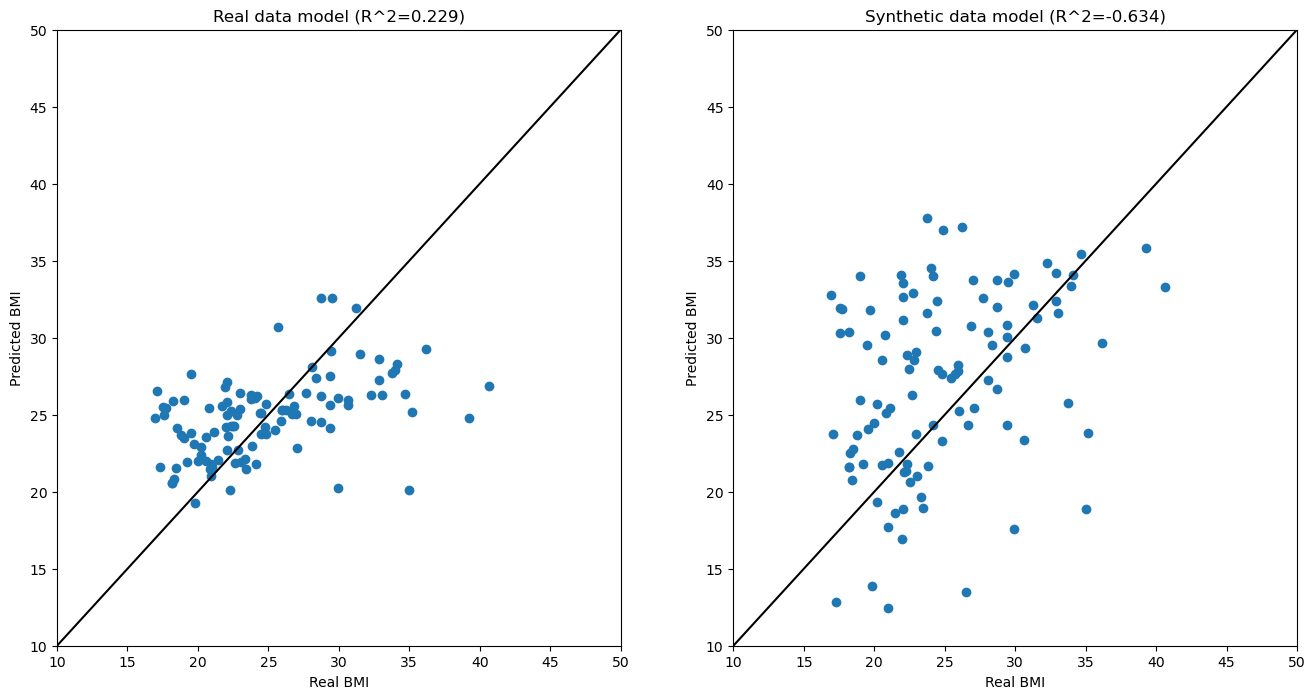

In [410]:
plot_features_before_norm = False
plot_features_after_norm = False
# 1. Train and Test Split (No validation since we are not doing hyperparameter tuning)
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42, shuffle=True)

# Plotting features before normalization
if plot_features_before_norm:
    print("Features before normalization")
    plt.figure(figsize=(12, 12))
    for i, feature in enumerate(X.columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(X_train[feature], bins="auto", kde=True)
        plt.title(f'Normalized {feature}')
    plt.tight_layout()
    plt.show()

X_train_standard = X_train.copy()
X_test_standard = X_test.copy()
X_train_standard[numeric_selection[:-1]] = scaler_standard.fit_transform(X_train_standard[numeric_selection[:-1]])
X_test_standard[numeric_selection[:-1]] = scaler_standard.transform(X_test_standard[numeric_selection[:-1]])


# Plotting features after normalization
if plot_features_after_norm:
    print("Features after normalization")
    plt.figure(figsize=(12, 12))
    for i, feature in enumerate(X.columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(X_train_standard[feature], bins="auto", kde=True)
        plt.title(f'Normalized {feature}')
    plt.subplot(4, 3, 12)
    sns.histplot(y_train_standard, bins="auto", kde=True)
    plt.title('Normalized BMI')
    plt.tight_layout()
    plt.show()

# "Fit" model
linReg_real = LinearRegression()
linReg_real.fit(X_train_standard, y_train)

print("Intercept: "+str(round(linReg_real.intercept_,3)))
print("Weight coefficients")
for i,column in enumerate(X_train.columns):
    print(column + ': ' + str(round(linReg_real.coef_[i],3)))

#Evaluate
y_test_pred = linReg_real.predict(X_test_standard)
rmse = root_mean_squared_error(y_test,y_test_pred)
print(rmse)
r_sqr = r2_score(y_test,y_test_pred)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred)
plt.xlabel("Real BMI")
plt.ylabel("Predicted BMI")
plt.title('Real data model (R^2='+str(round(r_sqr,3))+')')

#Plot unity line
plt.plot([10, 50],[10,50],color='black')

plt.xlim((10,50))
plt.ylim((10,50))

#Evaluate model with synthetic data on real data only
y_test_pred = linReg.predict(X_test_standard)
rmse = root_mean_squared_error(y_test,y_test_pred)
print(rmse)
r_sqr = r2_score(y_test,y_test_pred)

plt.subplot(1,2,2)
plt.scatter(y_test,y_test_pred)
plt.xlabel("Real BMI")
plt.ylabel("Predicted BMI")
plt.title('Synthetic data model (R^2='+str(round(r_sqr,3))+')')

#Plot unity line
plt.plot([10, 50],[10,50],color='black')

plt.xlim((10,50))
plt.ylim((10,50))
plt.show()

plt.show()


4.156196133123212
6.507790675895564


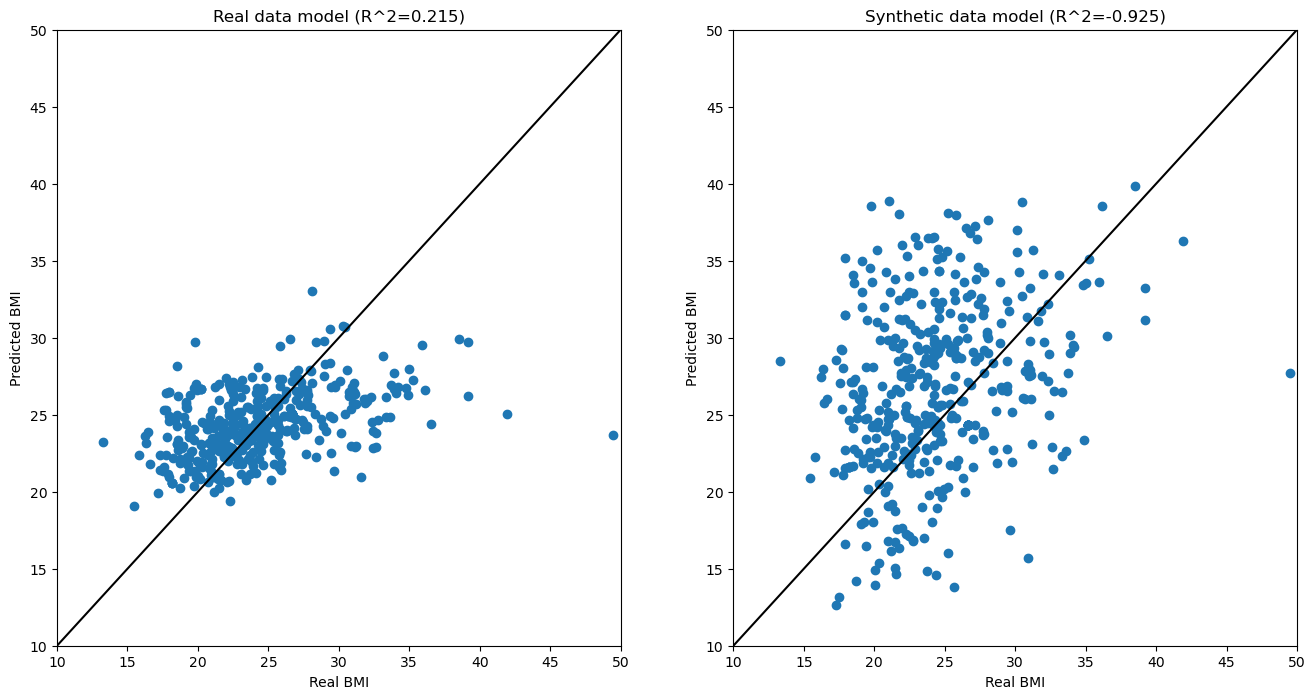

In [409]:
#Evaluate on train data
# Does it perform better here than in test? -> No
y_train_pred = linReg_real.predict(X_train_standard)
rmse = root_mean_squared_error(y_train,y_train_pred)
print(rmse)
r_sqr = r2_score(y_train,y_train_pred)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(y_train,y_train_pred)
plt.xlabel("Real BMI")
plt.ylabel("Predicted BMI")
plt.title('Real data model (R^2='+str(round(r_sqr,3))+')')

#Plot unity line
plt.plot([10, 50],[10,50],color='black')

plt.xlim((10,50))
plt.ylim((10,50))

#Evaluate model with synthetic data on real data only
y_train_pred = linReg.predict(X_train_standard)
rmse = root_mean_squared_error(y_train,y_train_pred)
print(rmse)
r_sqr = r2_score(y_train,y_train_pred)

plt.subplot(1,2,2)
plt.scatter(y_train,y_train_pred)
plt.xlabel("Real BMI")
plt.ylabel("Predicted BMI")
plt.title('Synthetic data model (R^2='+str(round(r_sqr,3))+')')

#Plot unity line
plt.plot([10, 50],[10,50],color='black')

plt.xlim((10,50))
plt.ylim((10,50))
plt.show()

plt.show()

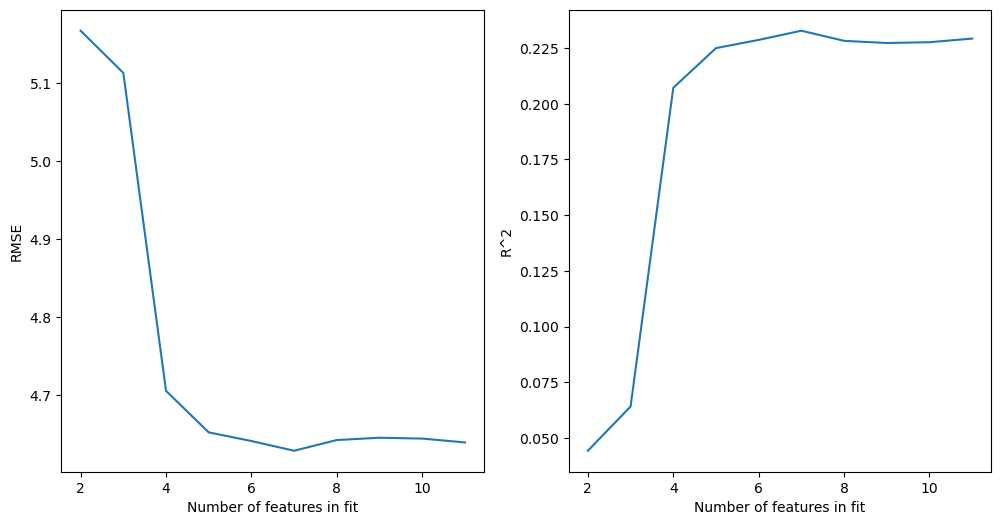

Selected features using RFE:
 ['Age' 'Qty Phys Activity' 'Gender' 'Family Overweight' 'Eat Btw Meals']


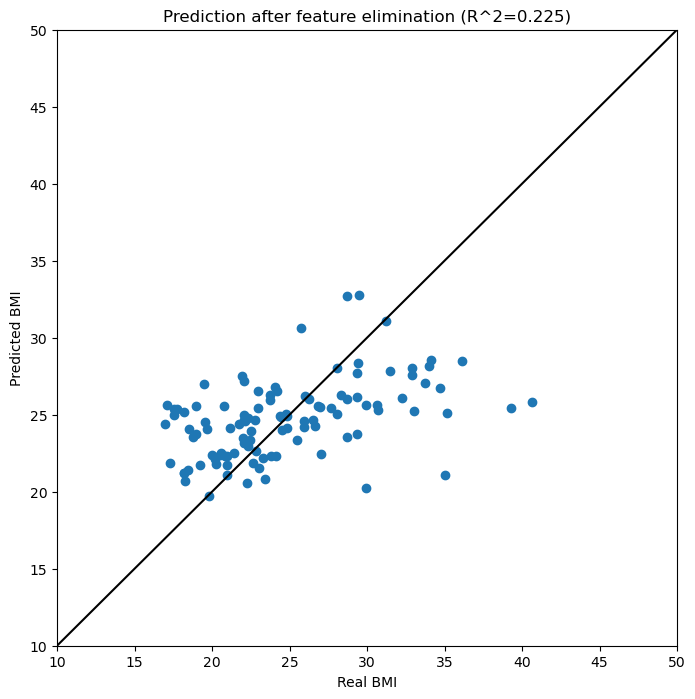

In [412]:
# Recursive Feature Elimination (RFE) 
model_rfe_real = LinearRegression()

# see how rmse changes with number of features
rmse_rfe = []
r_sqr_rfe = []
for i in range(2,12):
    rfe_real = RFE(estimator=model_rfe_real, n_features_to_select=i)
    rfe_real.fit(X_train_standard, y_train)
    #Evaluate
    y_test_pred_rfe = rfe_real.predict(X_test_standard)
    rmse_rfe.append(root_mean_squared_error(y_test,y_test_pred_rfe))
    r_sqr_rfe.append(r2_score(y_test,y_test_pred_rfe))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(2,12),rmse_rfe)
plt.ylabel("RMSE")
plt.xlabel("Number of features in fit")
plt.subplot(1,2,2)
plt.plot(range(2,12),r_sqr_rfe)
plt.ylabel("R^2")
plt.xlabel("Number of features in fit")
plt.show()

# chose number of features based on graph
rfe_real = RFE(estimator=model_rfe_real, n_features_to_select=5)
rfe_real.fit(X_train_standard, y_train)
print("Selected features using RFE:\n", X.columns[rfe_real.support_].values)


#Evaluate
y_test_pred = rfe_real.predict(X_test_standard)
rmse = root_mean_squared_error(y_test,y_test_pred)
r_sqr = r2_score(y_test,y_test_pred)

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_test_pred)
plt.xlabel("Real BMI")
plt.ylabel("Predicted BMI")
plt.title('Prediction after feature elimination (R^2='+str(round(r_sqr,3))+')')

#Plot unity line
plt.plot([10, 50],[10,50],color='black')

plt.xlim((10,50))
plt.ylim((10,50))
plt.show()